In [1]:
from Task1 import *
from PreprocLib2 import *

warnings.filterwarnings('ignore')

## Разуваев Д. 3540203/10101

# Лабораторная работа 5

## Photo1

Гистограмма и функция распределения исходного изображения:

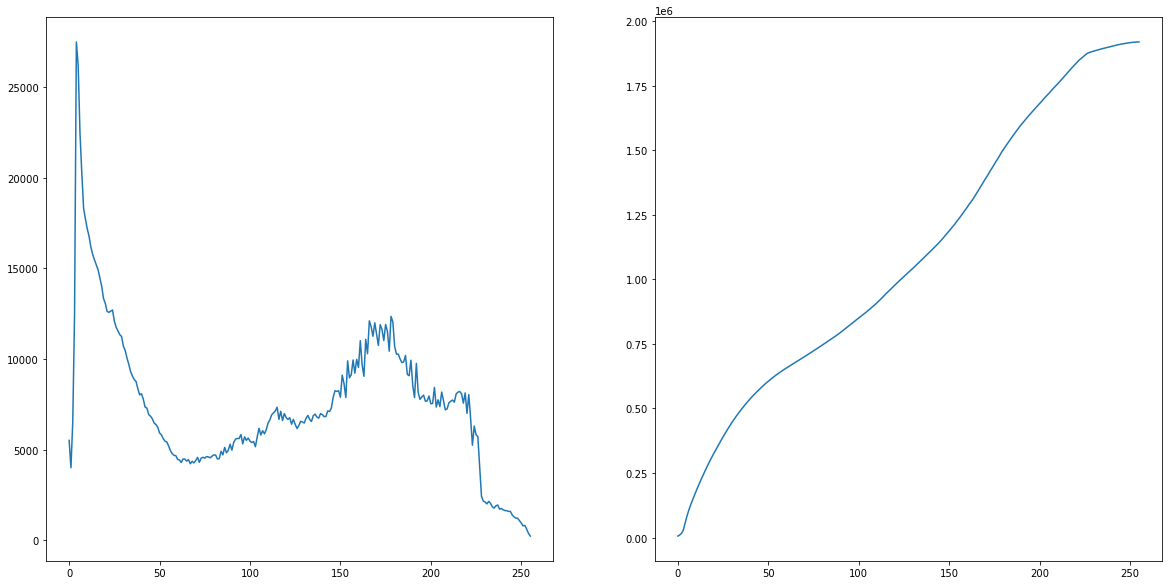

In [6]:
path = 'images/photo1.jpg'
origImage = MImage(path)
image = MImage(path)
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

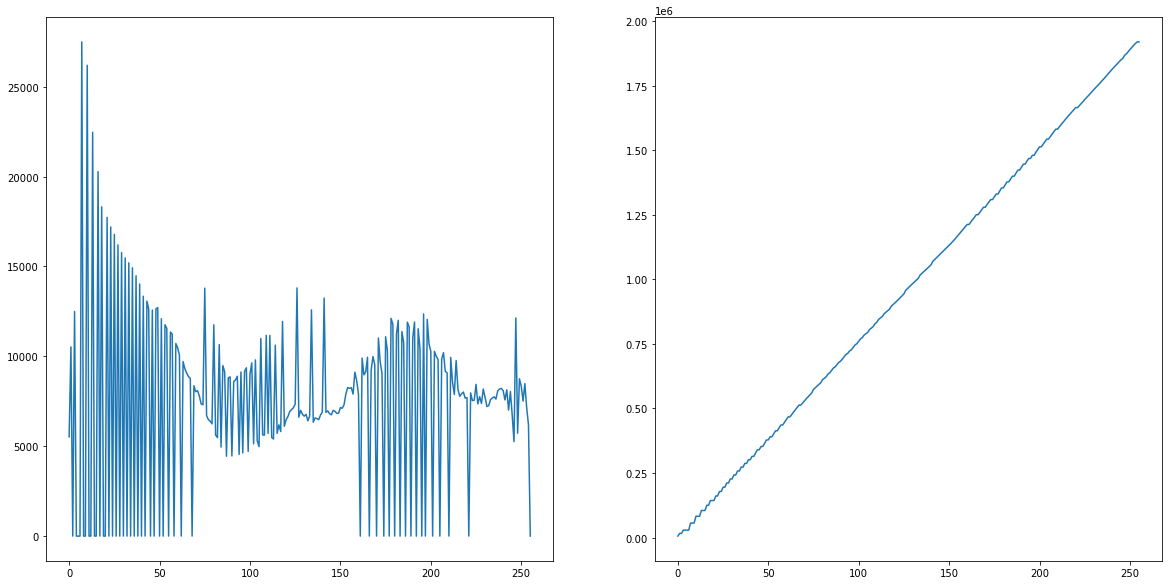

In [7]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

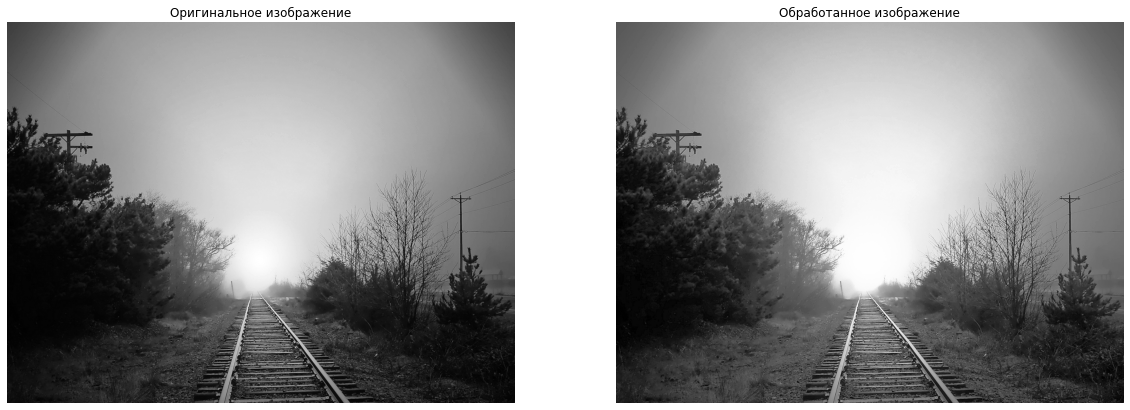

In [8]:
PlotTwoImages(origImage, image) 

## Photo2

Гистограмма и функция распределения исходного изображения:

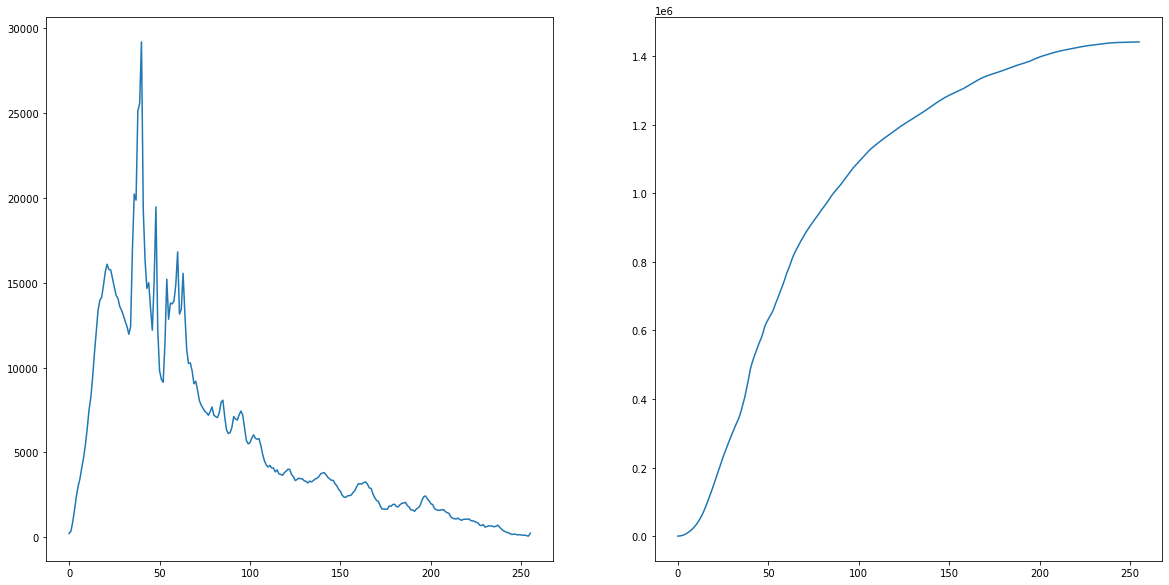

In [9]:
path = 'images/photo2.jpg'
origImage = MImage(path)
image = MImage(path)
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

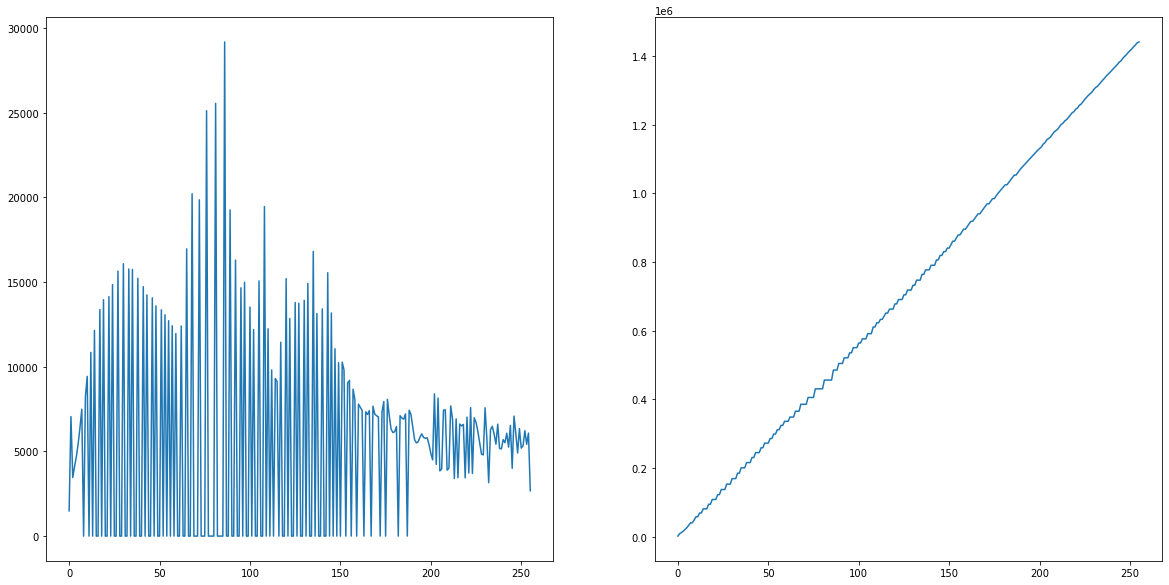

In [10]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

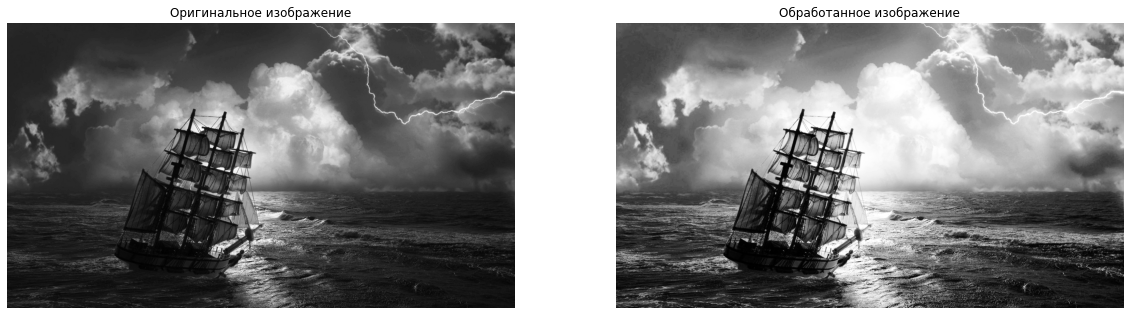

In [11]:
PlotTwoImages(origImage, image) 

## Photo3

Гистограмма и функция распределения исходного изображения:

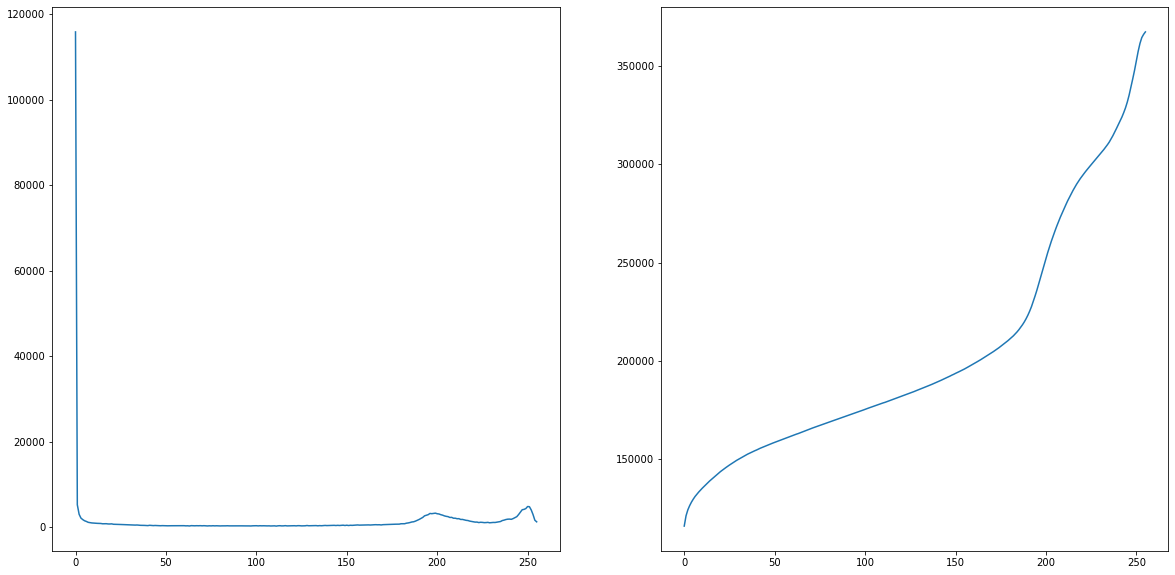

In [12]:
path = 'images/photo3.jpg'
origImage = MImage(path)
image = MImage(path)
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

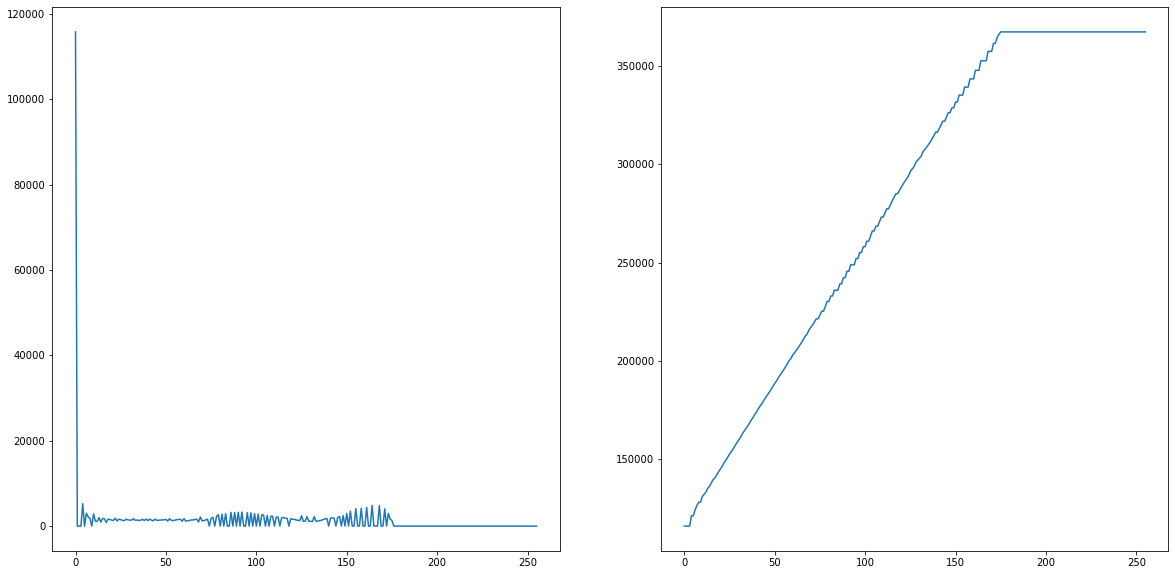

In [13]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

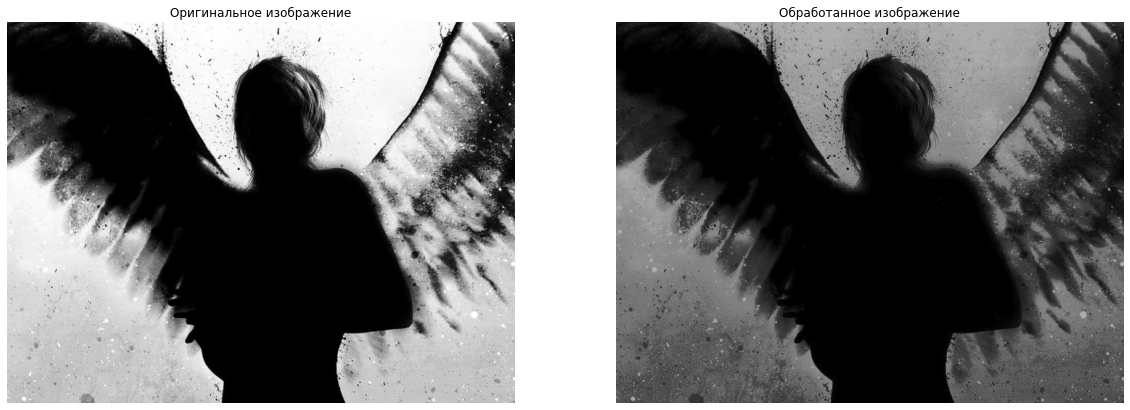

In [14]:
PlotTwoImages(origImage, image) 

## Photo4

Гистограмма и функция распределения исходного изображения:

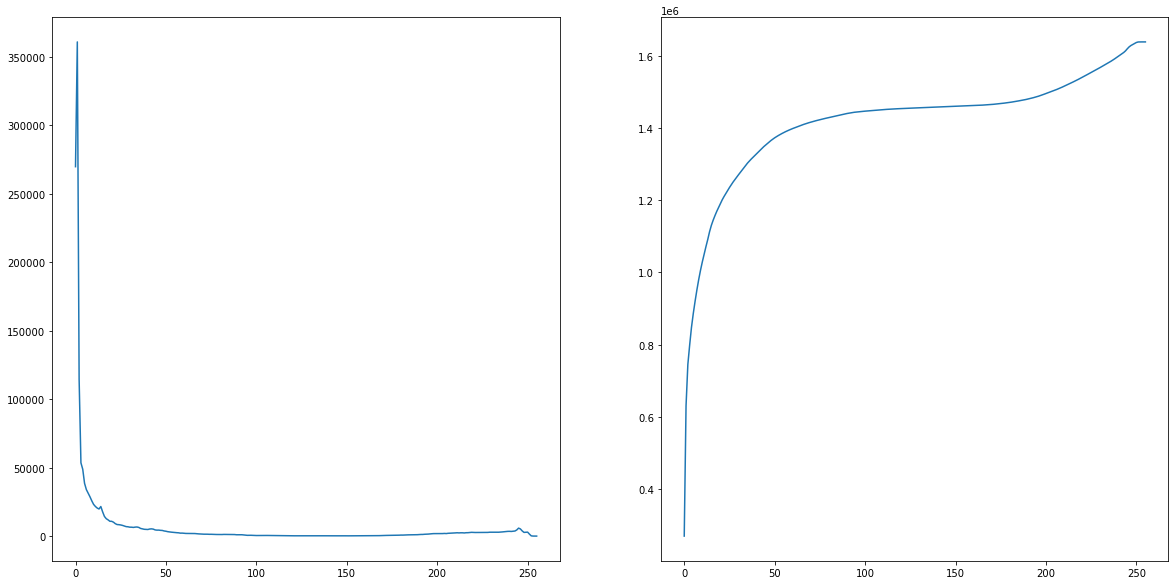

In [28]:
path = 'images/photo4.jpg'
origImage = MImage(path)
image = MImage(path)
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

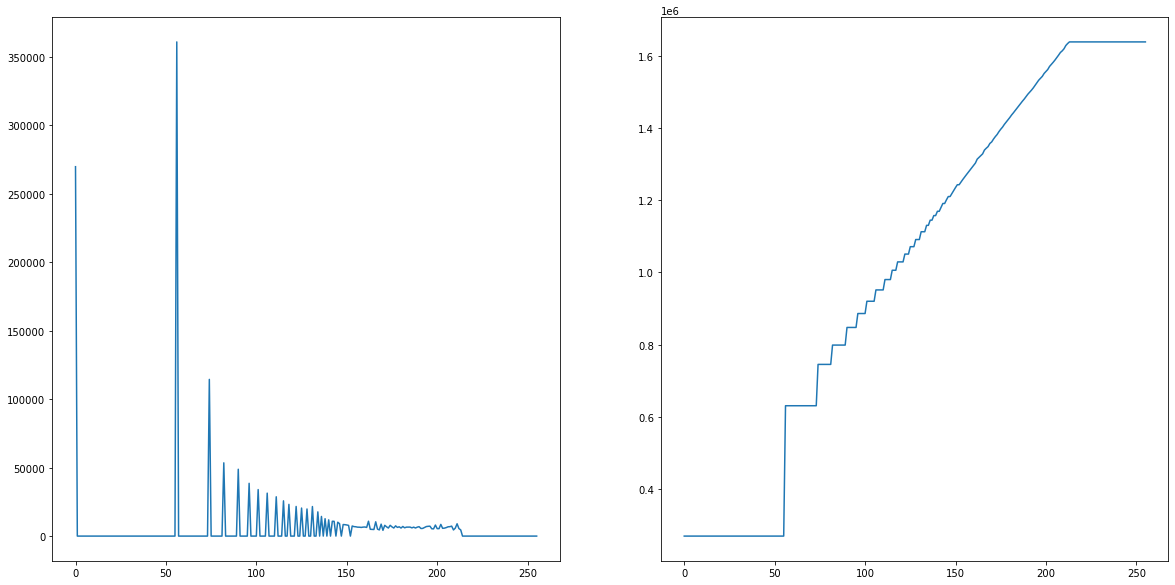

In [29]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

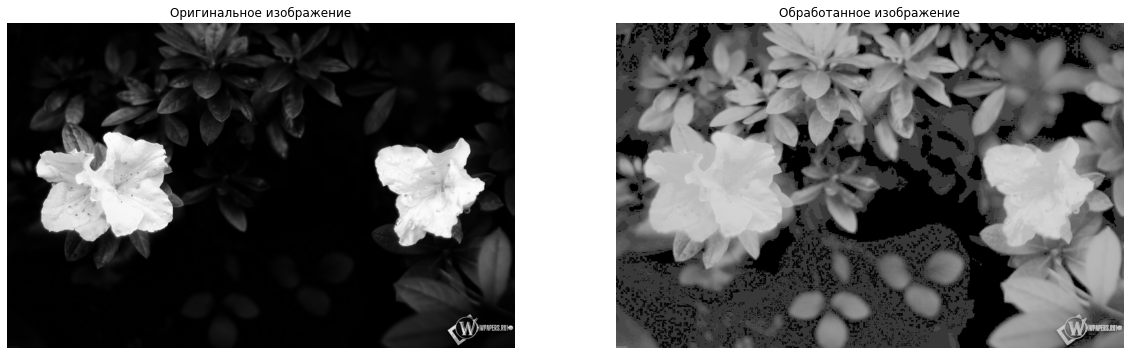

In [30]:
PlotTwoImages(origImage, image) 

## HollywoodLC

Гистограмма и функция распределения исходного изображения:

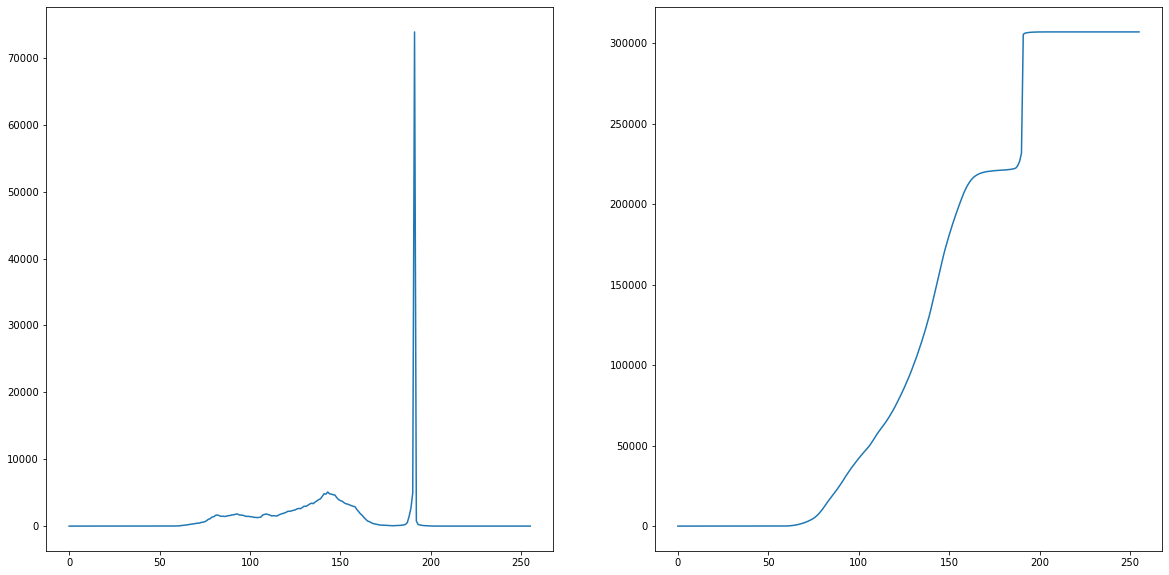

In [18]:
path = 'images/HollywoodLC.jpg'
origImage = MImage(path)
image = MImage(path)
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

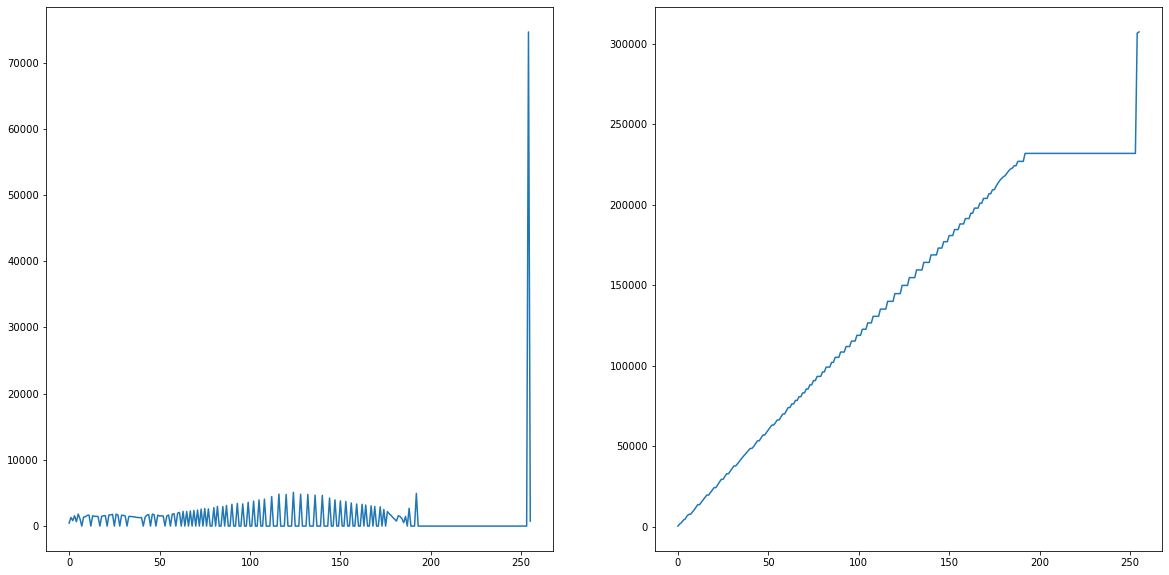

In [19]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

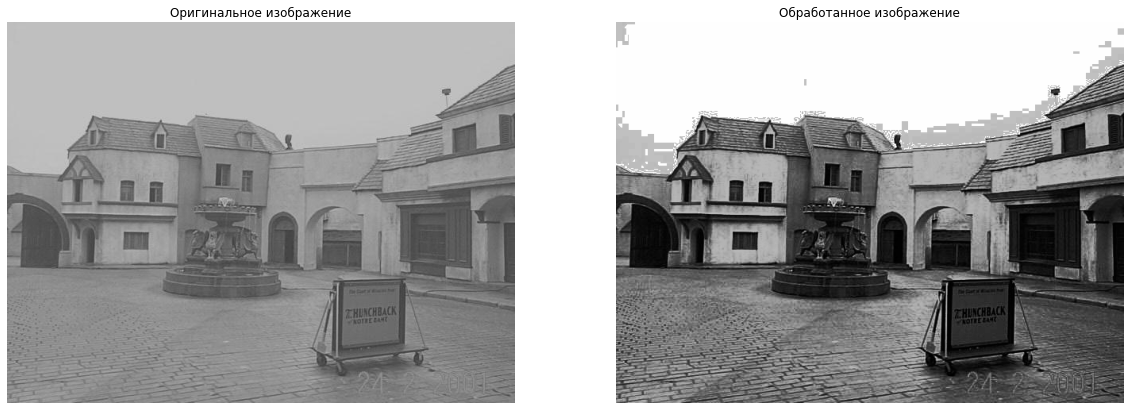

In [20]:
PlotTwoImages(origImage, image) 

## u0.xcr

Гистограмма и функция распределения исходного изображения:

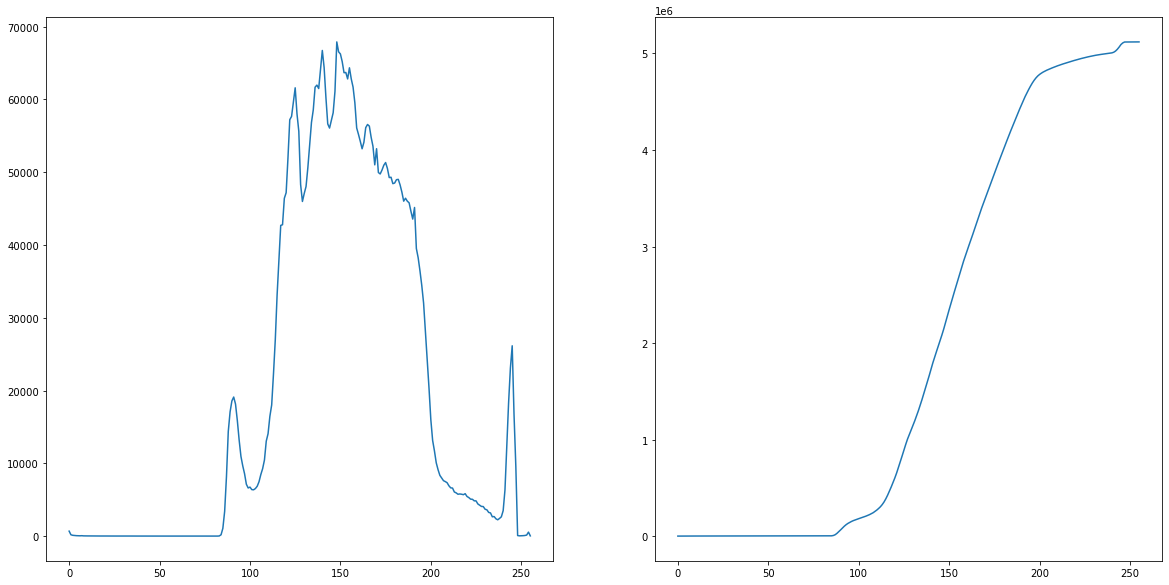

In [22]:
path = 'images/u0.xcr'
origImage = MImage(); origImage.OpenXcr(path,  10240, (2500, 2048))
image = MImage(); image.OpenXcr(path, 10240, (2500, 2048))
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

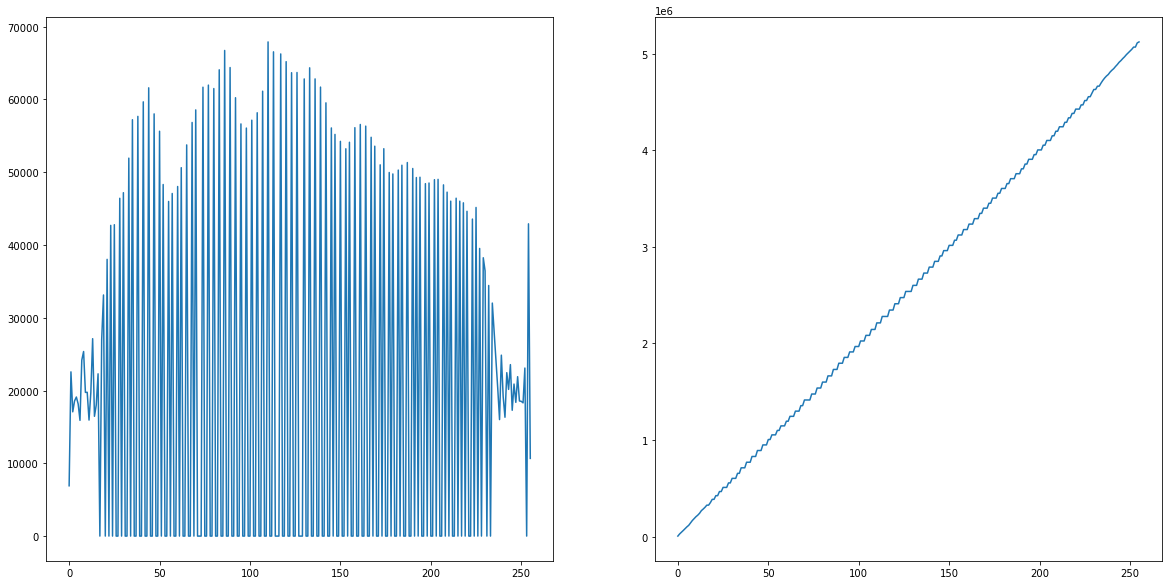

In [23]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

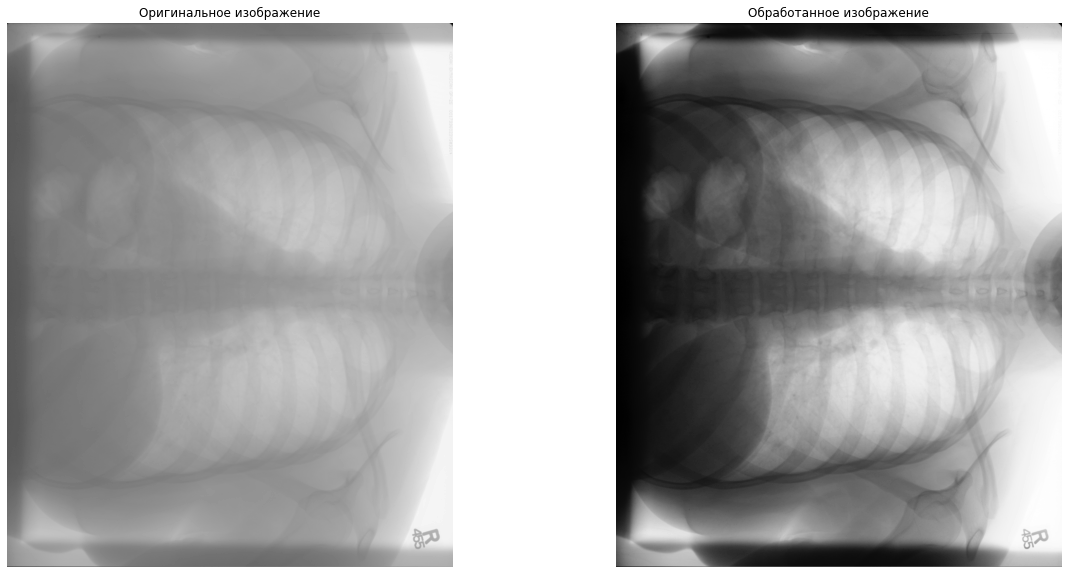

In [24]:
PlotTwoImages(origImage, image) 

## c12-85v.xcr

Гистограмма и функция распределения исходного изображения:

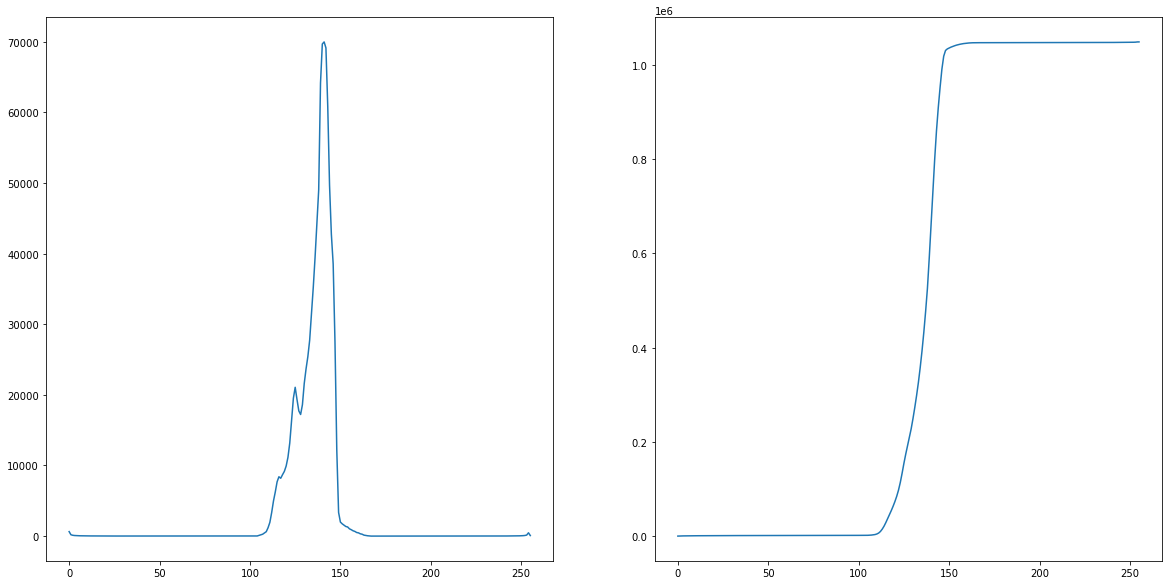

In [25]:
path = 'images/c12-85v.xcr'
origImage = MImage(); origImage.OpenXcr(path, 10240, (1024, 1024))
image = MImage(); image.OpenXcr(path, 10240, (1024, 1024))
image.PrintHistAndCdf()

Гистограмма и функция распределения обработанного изображения с помощью метода эквализации гистограммы.

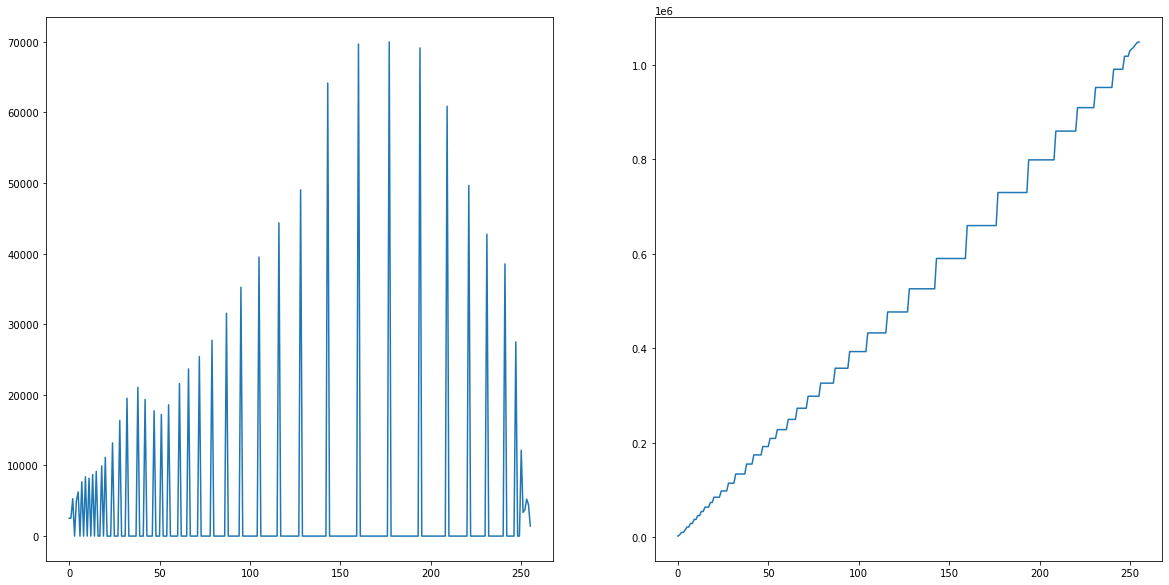

In [26]:
image.equalize_image()
image.PrintHistAndCdf()

Сравнение оригинального и обработанного изображения:

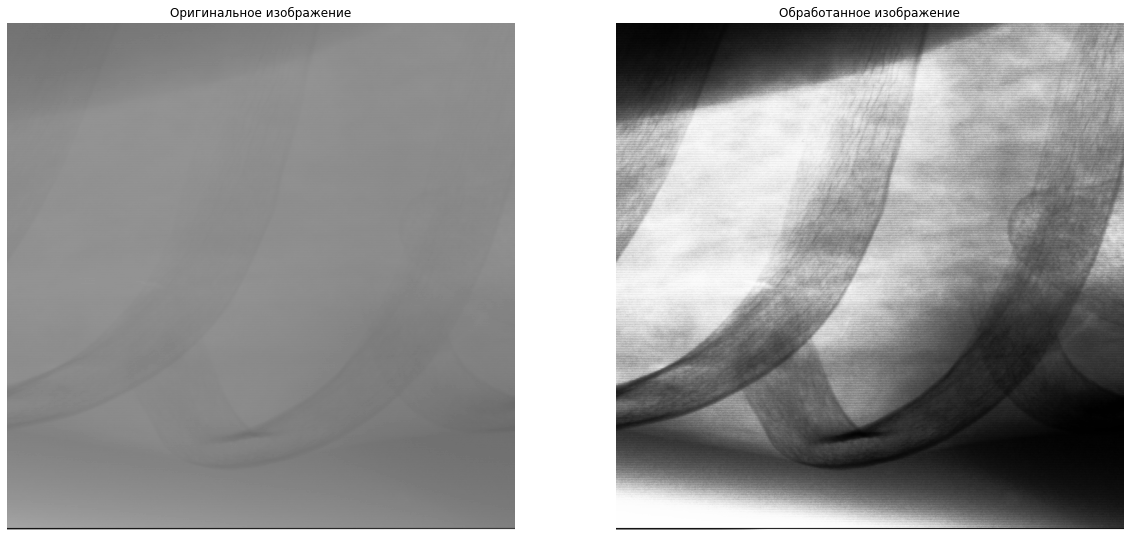

In [27]:
PlotTwoImages(origImage, image) 

## Вывод: 
Если изображение низкоконтрастное, то эквализация позволяет повысить контрастность (особенно хорошо видно на рентгеновских снимках). Если высококонстрастное, то появляются артефакты (например бело-квадратное небо на HollywoodLC)

# Лабораторная работа 6

## Файл u0.xcr

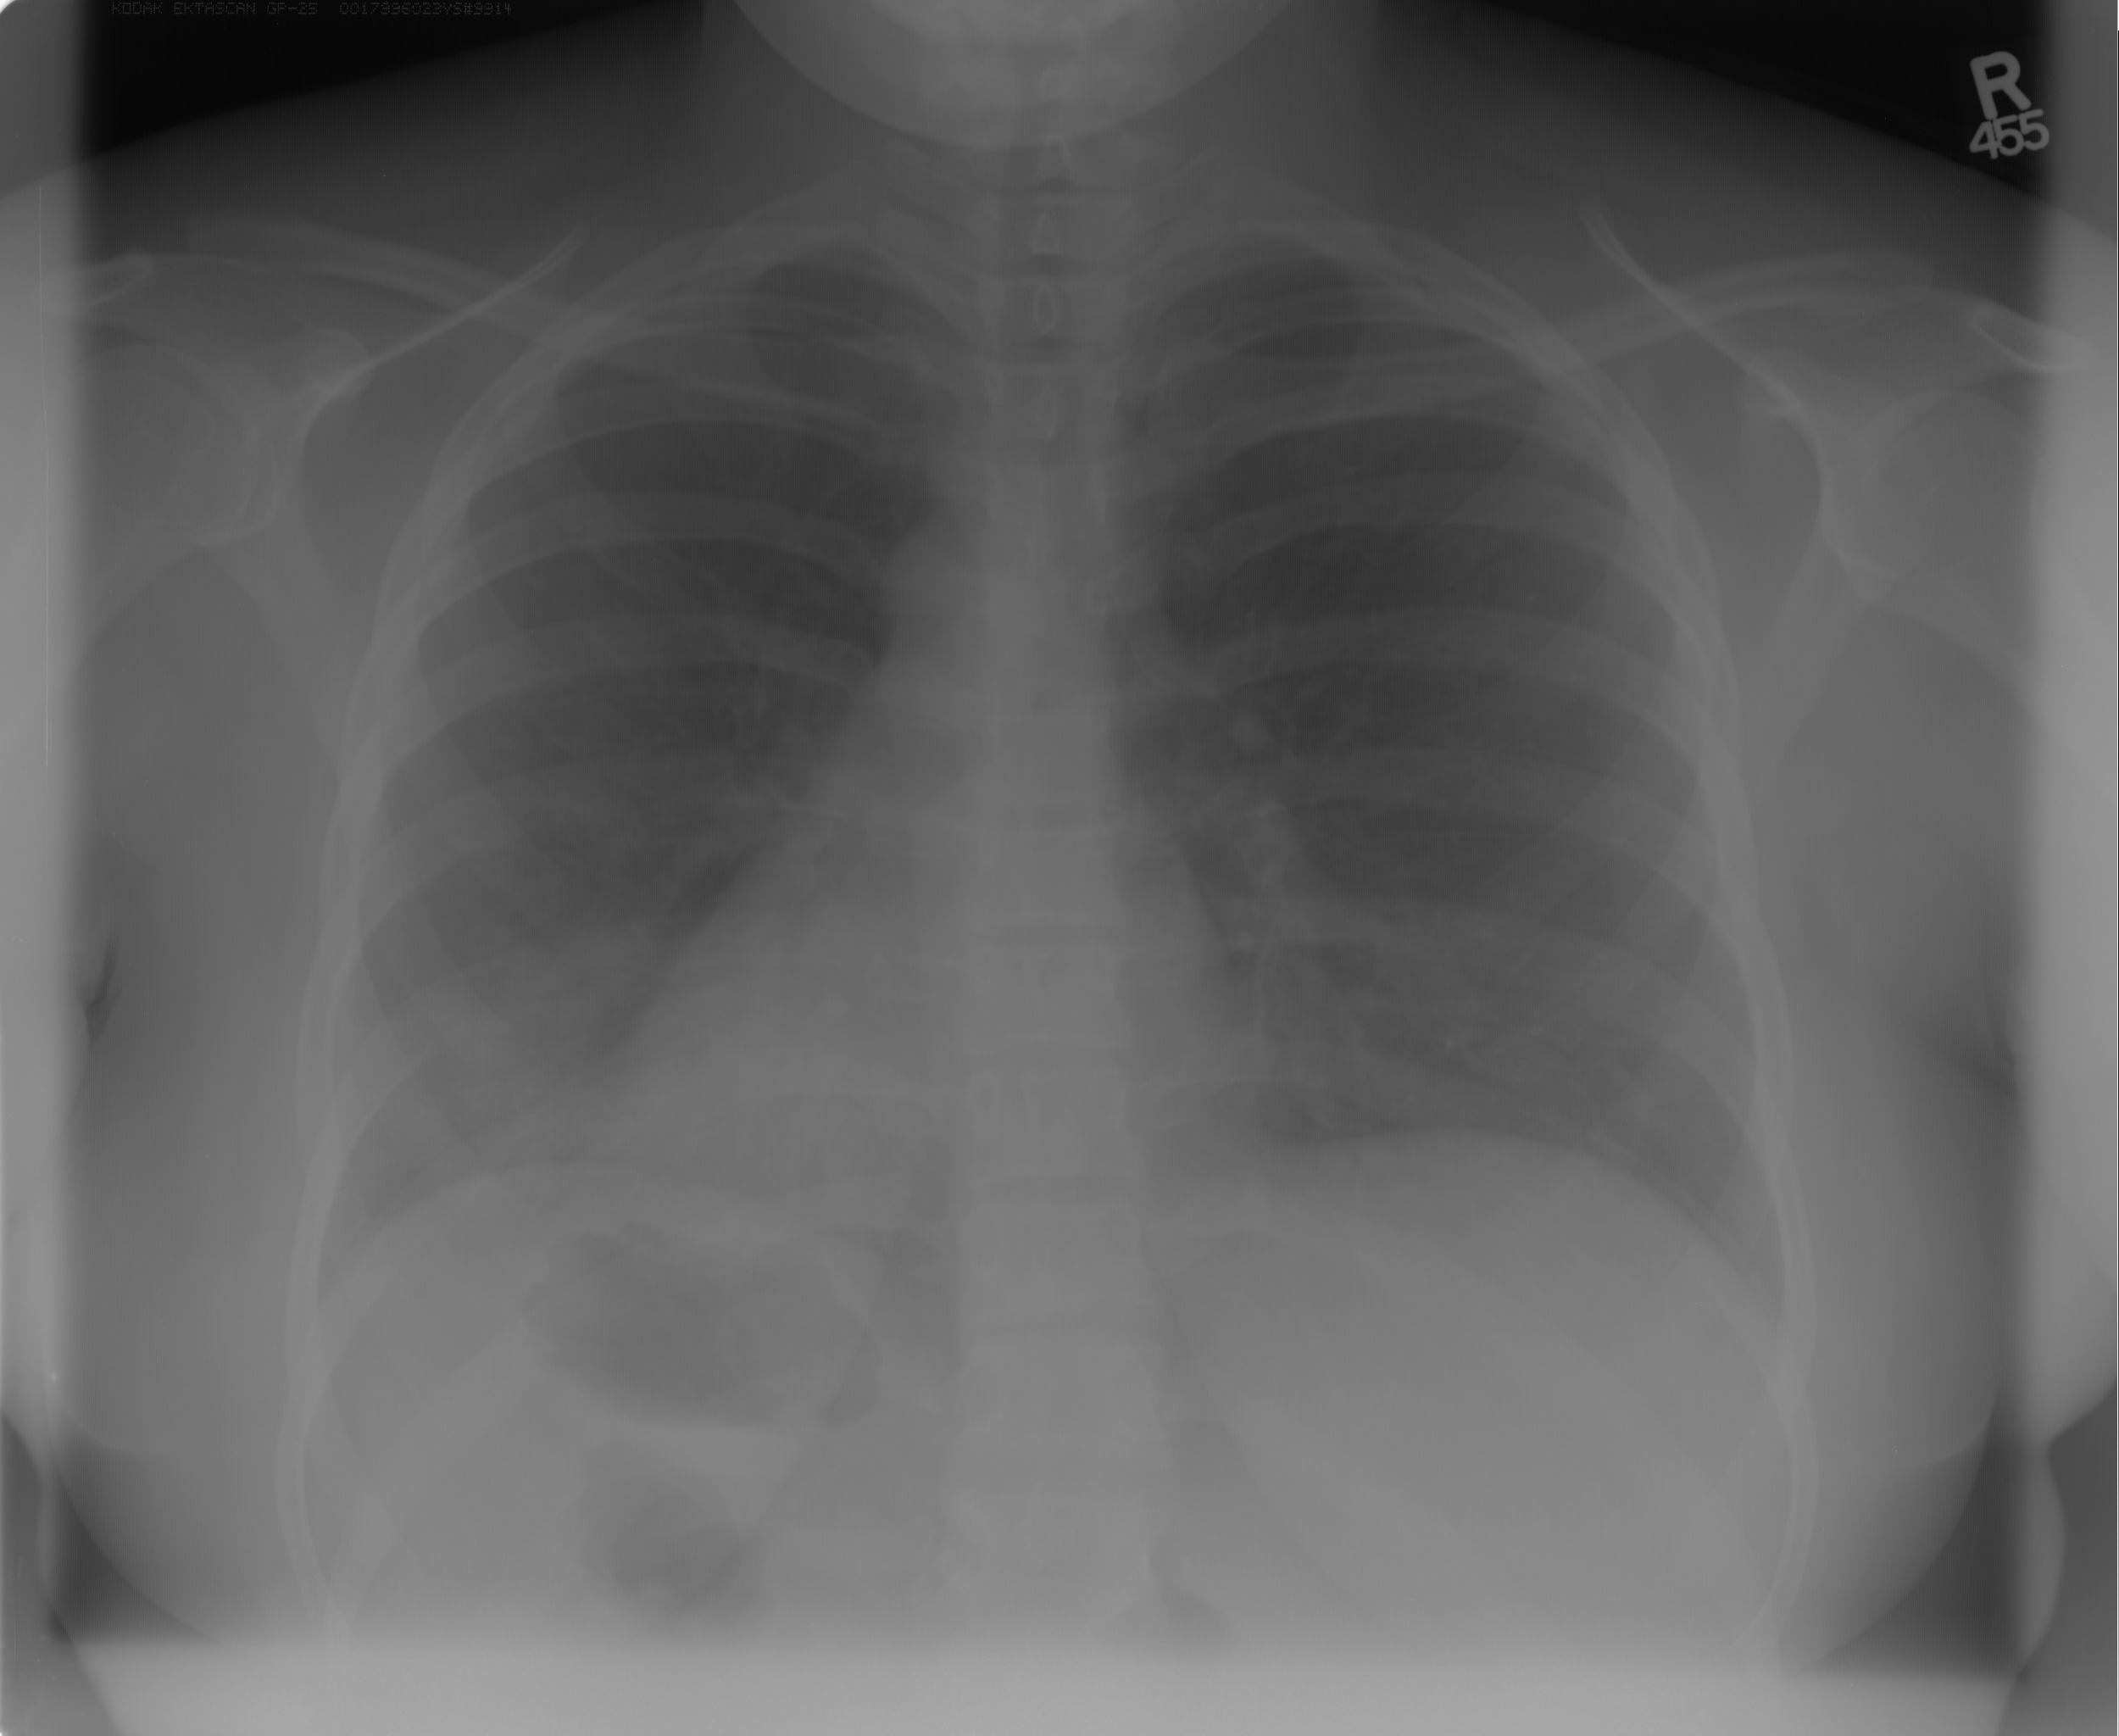

In [32]:
image = MImage()
image.OpenXcr('images/u0.xcr',  10240, (2500,2048))
image.Rotate()
image.Negative()
image.Show()

Рассмотрим 1 и 13 строки изображения и построим их производные. 

In [44]:
diff1 = Diff(image.arr[1])
diff13 = Diff(image.arr[13])
auto1 = Correlation.AutoCorrelation(diff1)
cross1_13 = Correlation.CrossCorrelation(diff1, diff13)

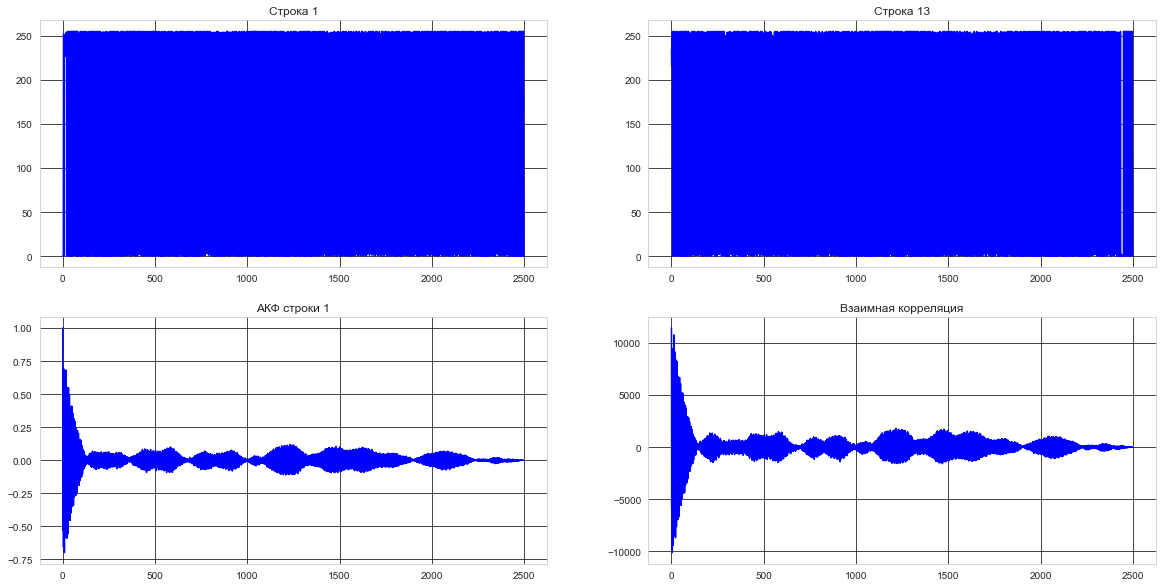

In [51]:
display([diff1, diff13, auto1, cross1_13], figsize=(20,10), titles=['Производная строки 1', 'Производная Строки 13', 'АКФ строки 1', 'Взаимная корреляция'])

Построим спектр производной первой строки:

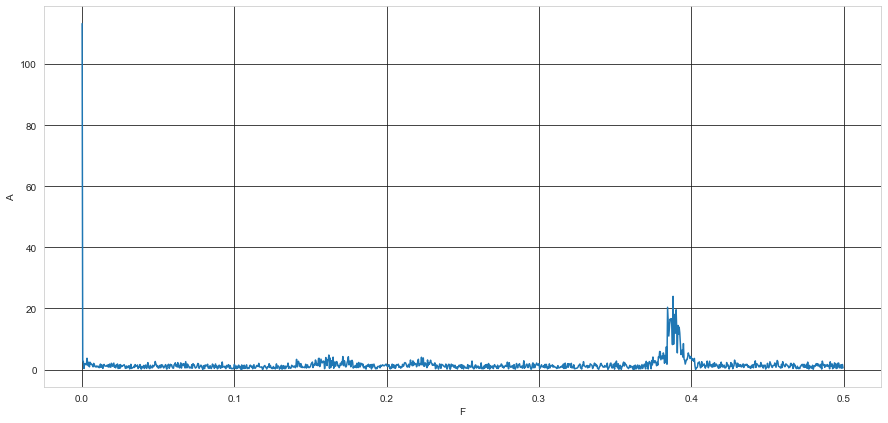

In [54]:
fur = Analysis.FastFurie(diff1, dt=1)
IO_RW.SpecDisplay(fur)

Максимум находится где-то в районе 0.38. Применим режекторный фильтр с граничными частотами 0.36 и 0.41. Спектр фильтра:

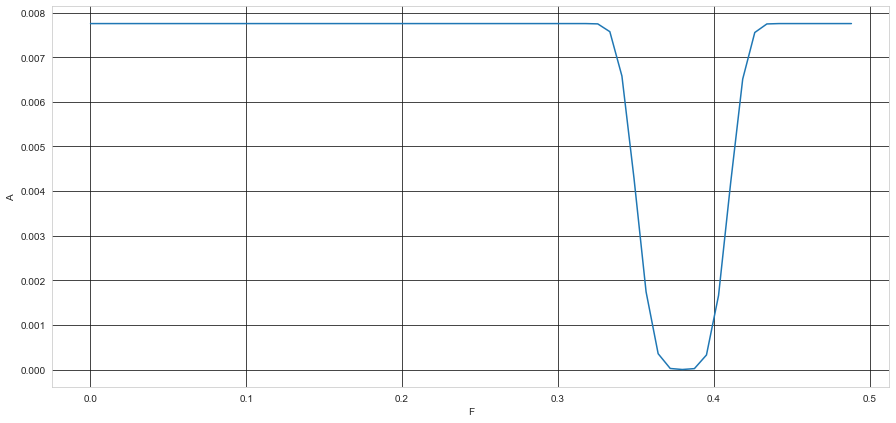

In [69]:
filt = Analysis.bsw(0.35, 0.41, m=64, dt=1)
IO_RW.SpecDisplay(Analysis.FastFurie(filt, dt=1))

In [ ]:
В результате применения фильтра получим изображение:

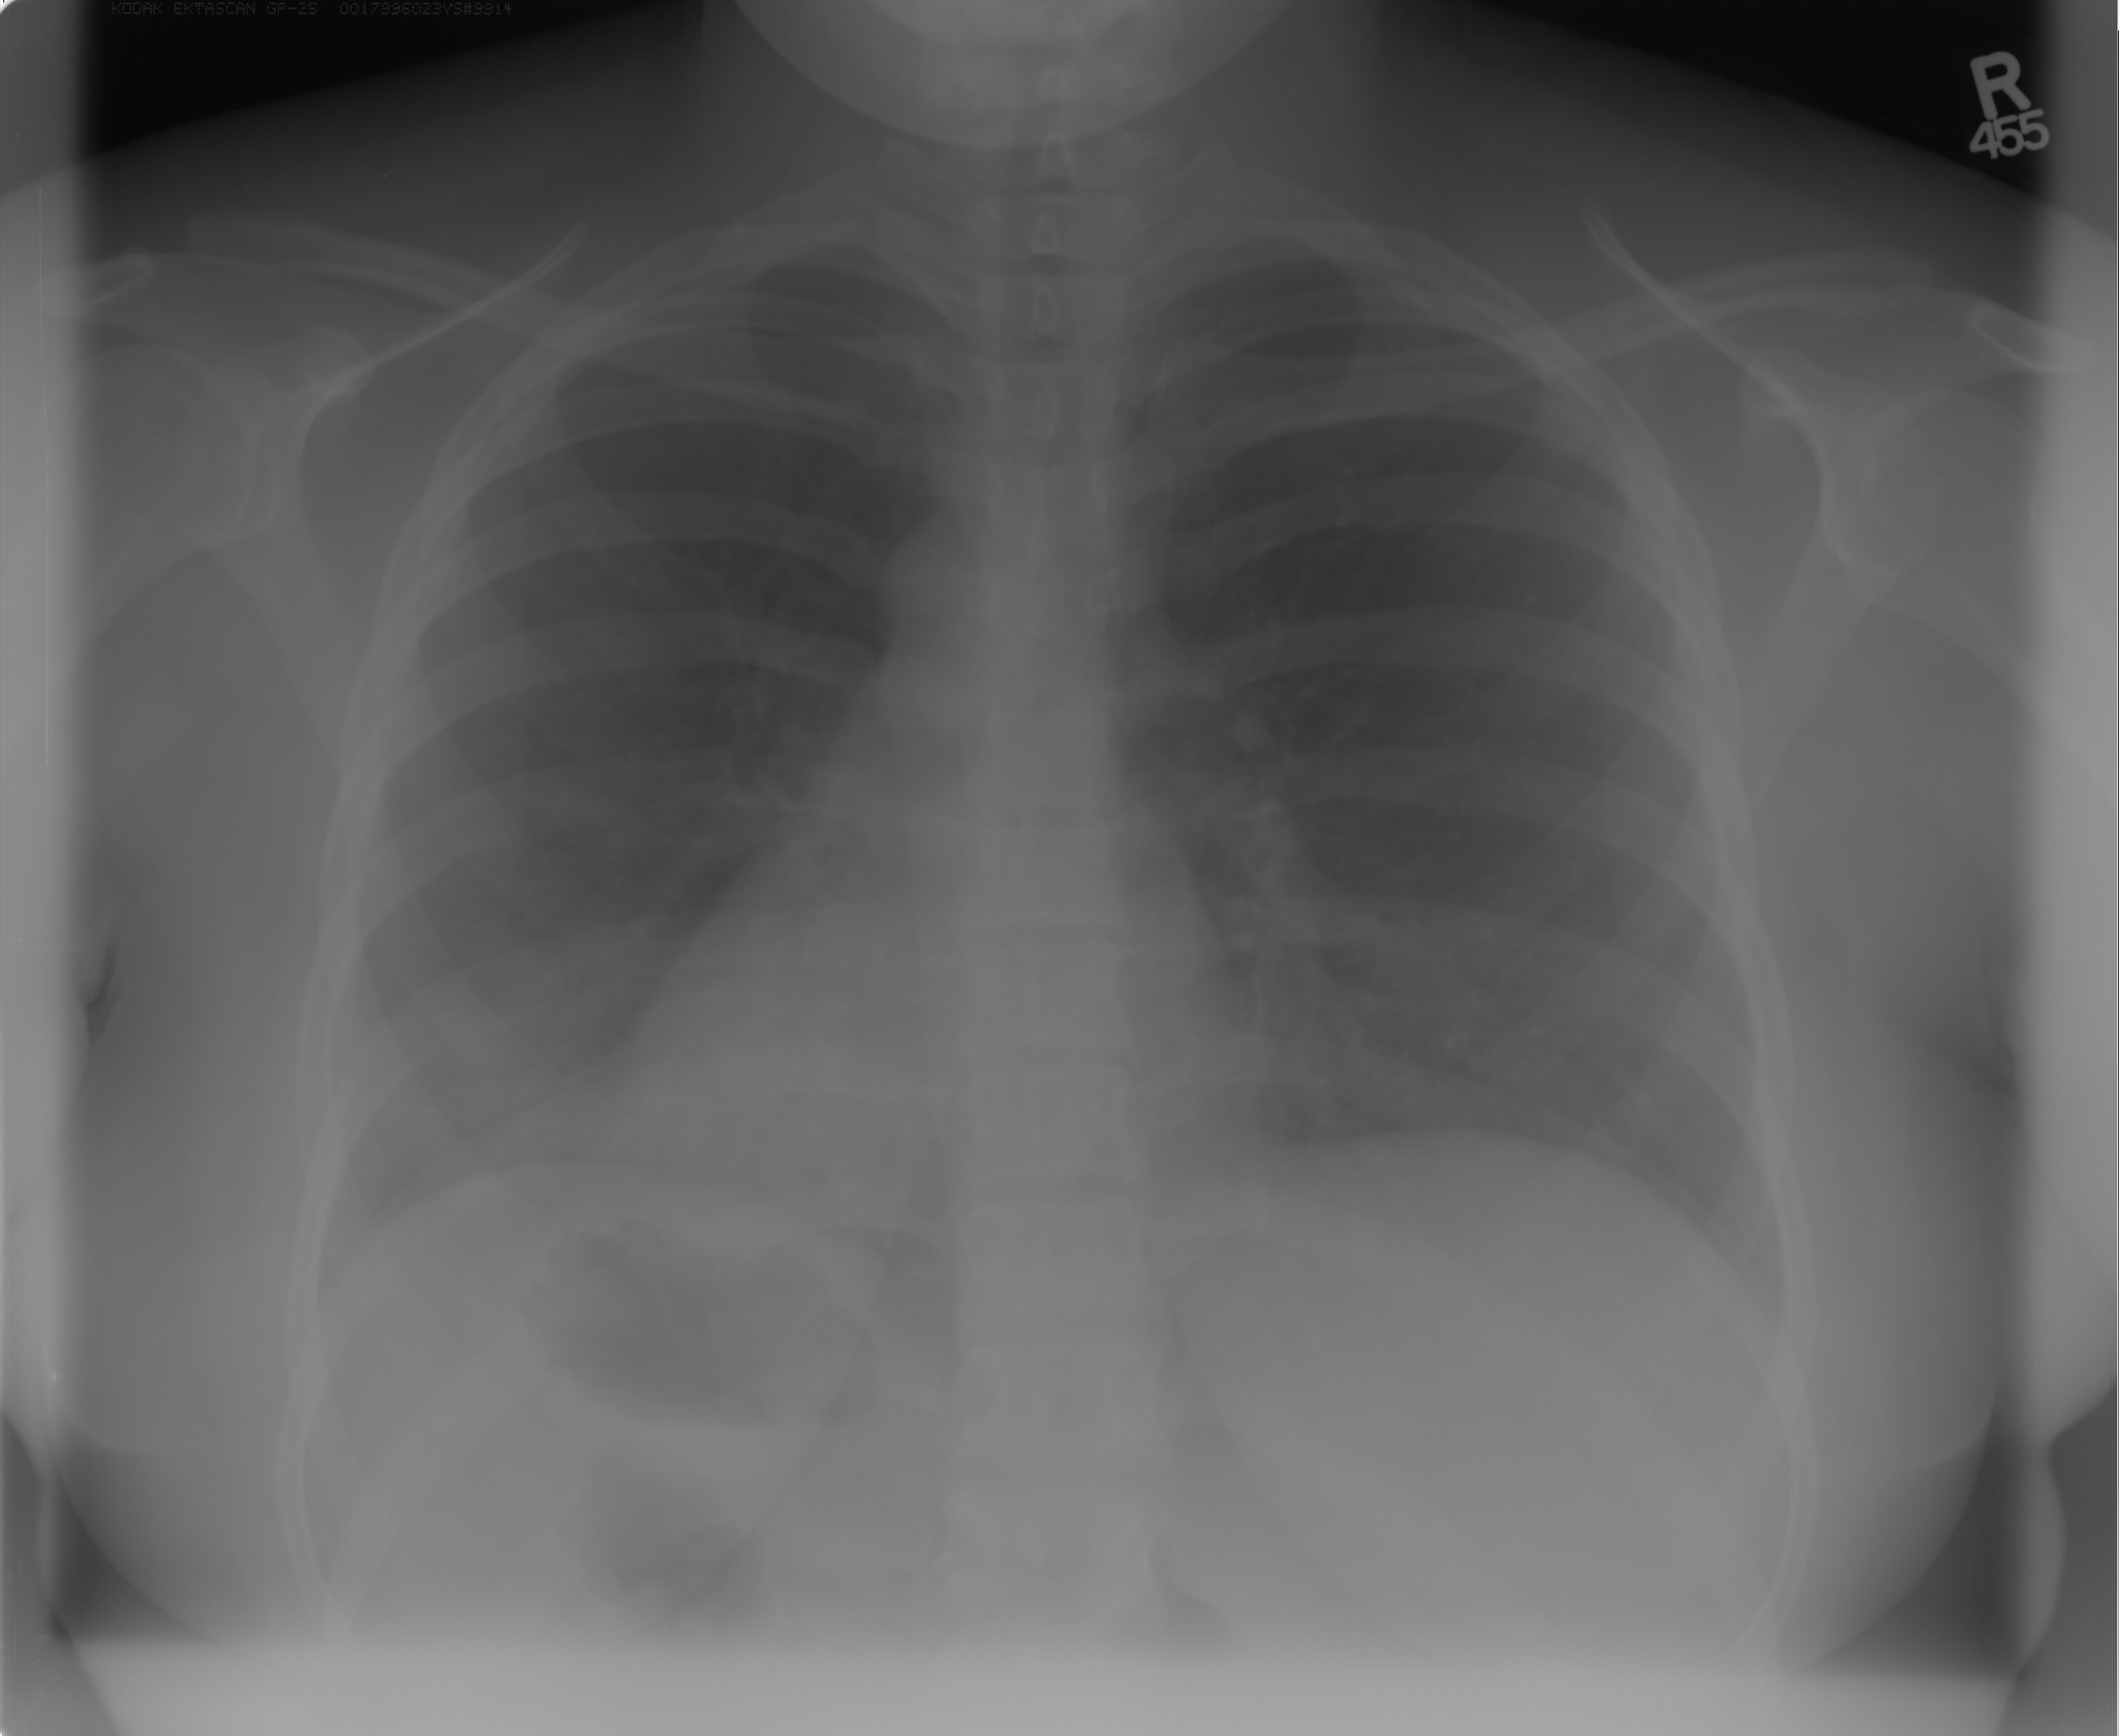

In [70]:
filtredImg = Supressor(image, filt)
Image.fromarray(filtredImg)

Отобразим спектр первой строки измененного изображения:
    

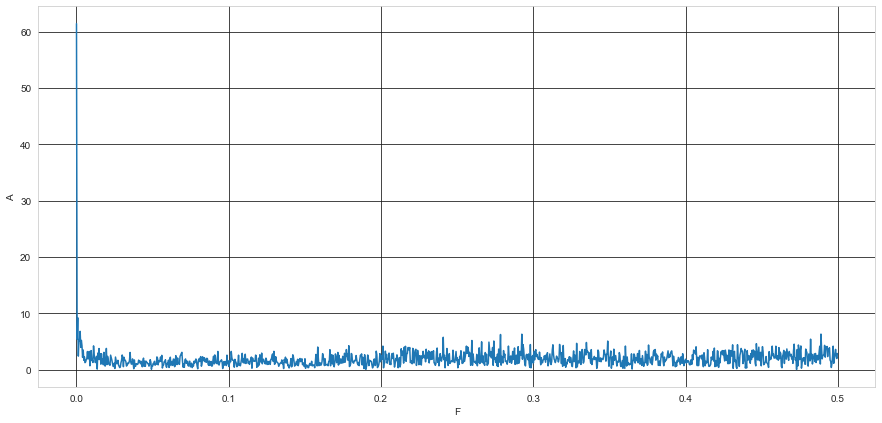

In [78]:
diff1_edit = Diff(filtredImg[1])
fur = Analysis.FastFurie(diff1_edit, dt=1)
IO_RW.SpecDisplay(fur)

## Файл c12-85v.xcr

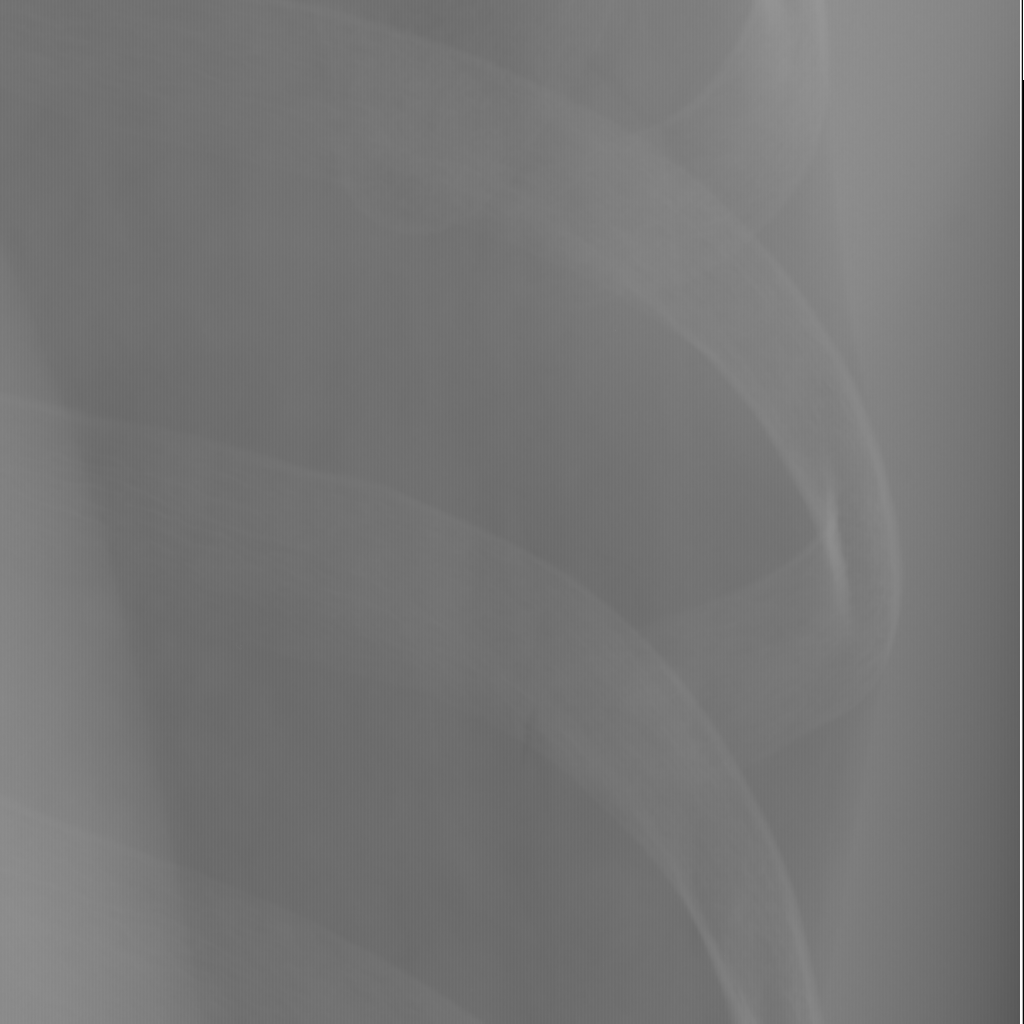

In [80]:
image = MImage()
image.OpenXcr('images/c12-85v.xcr',  10240, (1024, 1024))
image.Rotate()
image.Negative()
image.Show()

Рассмотрим 1 и 13 строки изображения и построим их производные. 

In [81]:
diff1 = Diff(image.arr[1])
diff13 = Diff(image.arr[13])
auto1 = Correlation.AutoCorrelation(diff1)
cross1_13 = Correlation.CrossCorrelation(diff1, diff13)

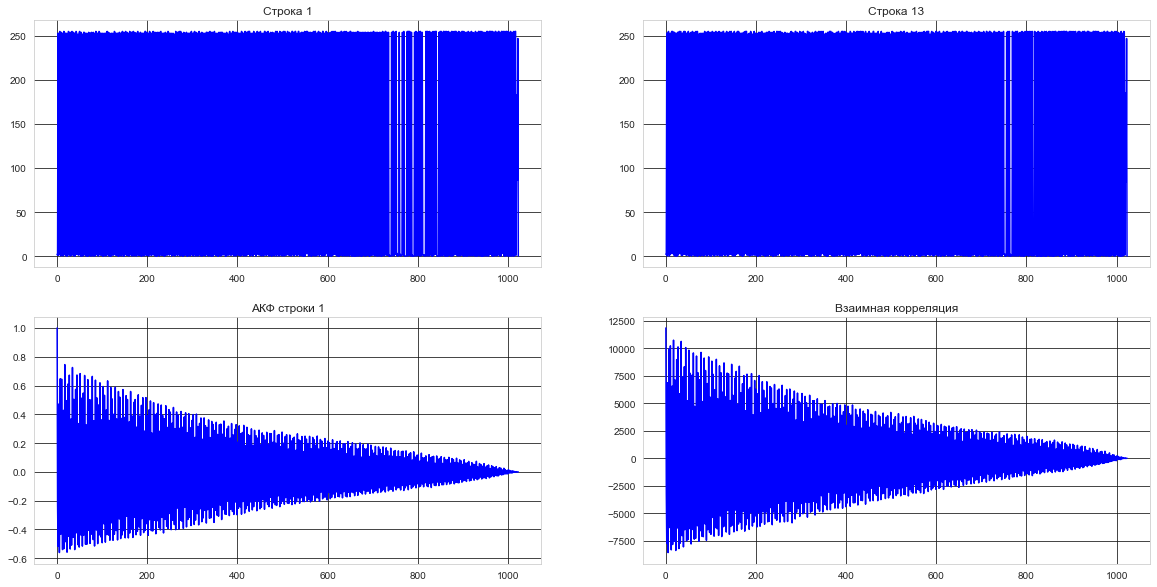

In [82]:
display([diff1, diff13, auto1, cross1_13], figsize=(20,10), titles=['Строка 1', 'Строка 13', 'АКФ строки 1', 'Взаимная корреляция'])

Построим спектр производной первой строки:

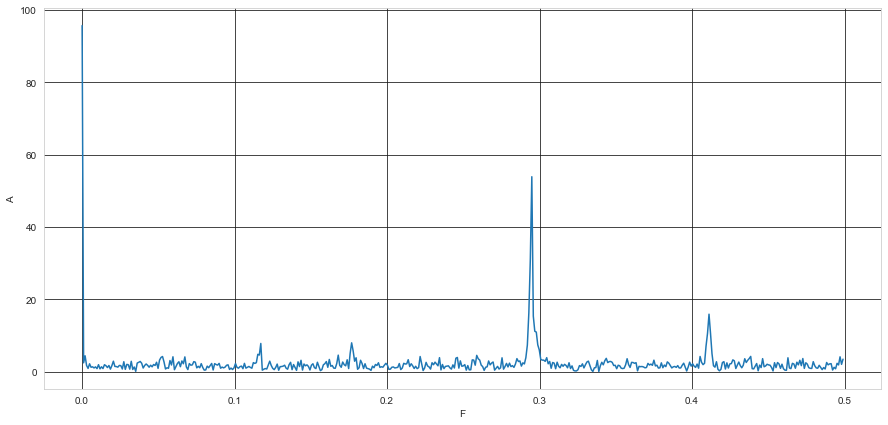

In [83]:
fur = Analysis.FastFurie(diff1, dt=1)
IO_RW.SpecDisplay(fur)

Максимум находится где-то в районе 0.29. Применим режекторный фильтр с граничными частотами 0.27 и 0.31. Спектр фильтра:

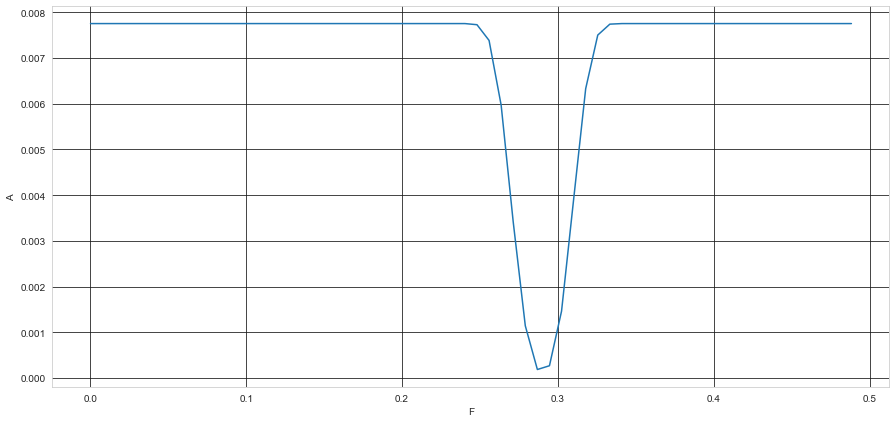

In [84]:
filt = Analysis.bsw(0.27, 0.31, m=64, dt=1)
IO_RW.SpecDisplay(Analysis.FastFurie(filt, dt=1))

В результате применения фильтра получим изображение:

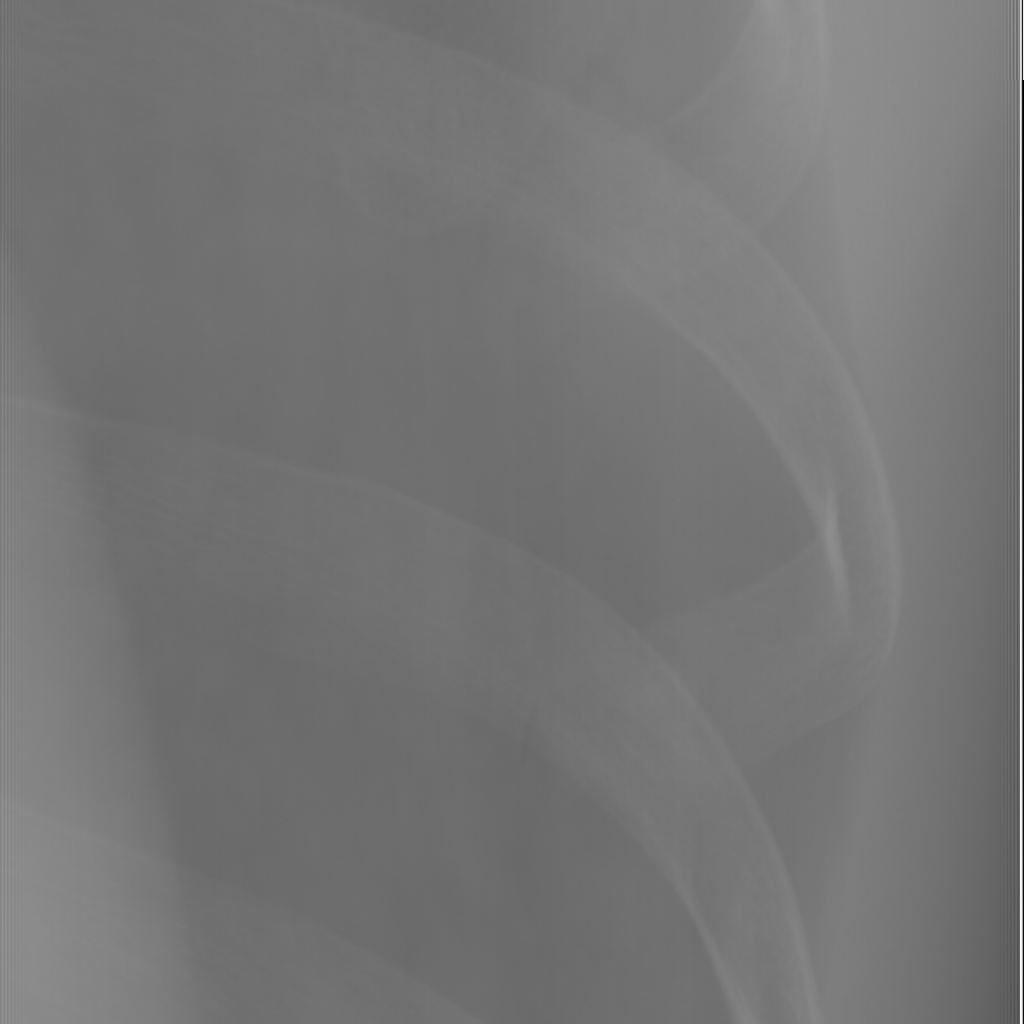

In [86]:
filtredImg = Supressor(image, filt)
Image.fromarray(filtredImg)

Отобразим спектр первой строки измененного изображения:
    

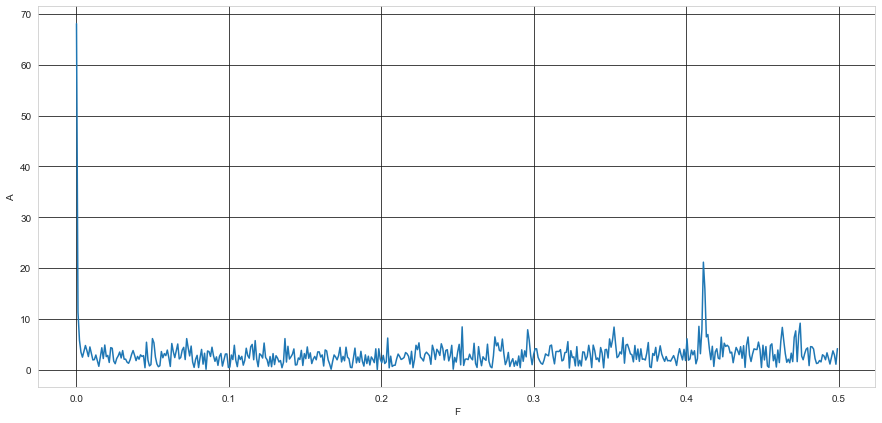

In [87]:
diff1_edit = Diff(filtredImg[1])
fur = Analysis.FastFurie(diff1_edit, dt=1)
IO_RW.SpecDisplay(fur)

# Лабораторная работа 7

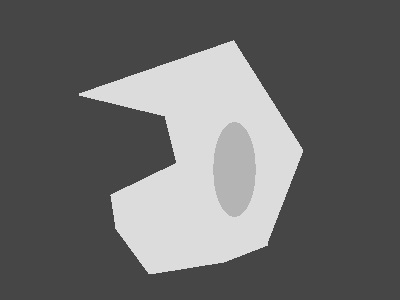

In [162]:
model = MImage('model.png')
model.Show()

Гистограмма и функция распределения:

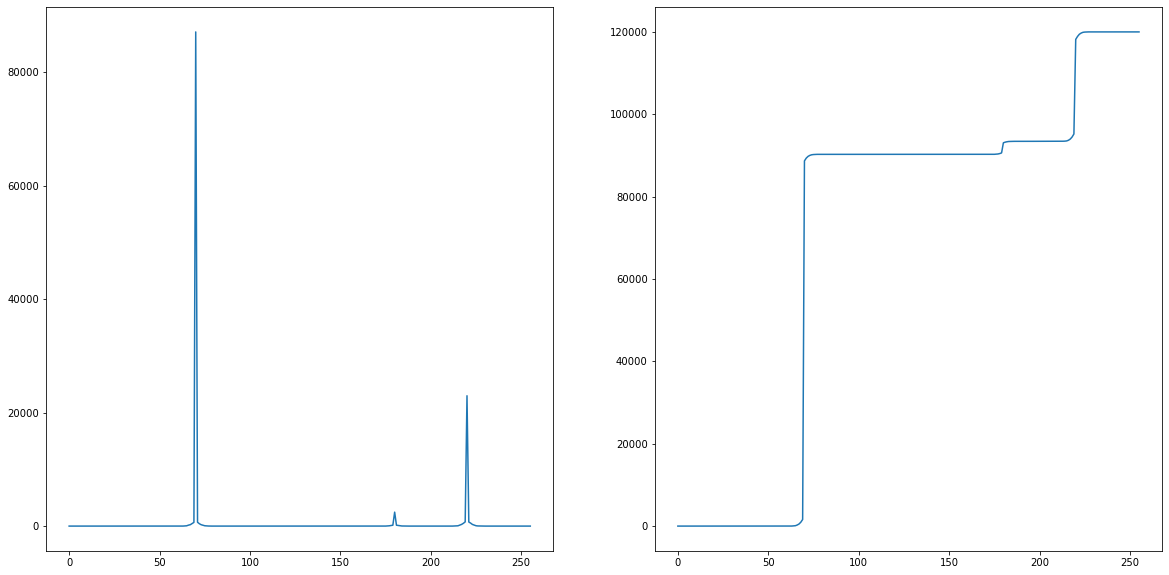

In [163]:
model.PrintHistAndCdf()

## Шум Соль&Перец

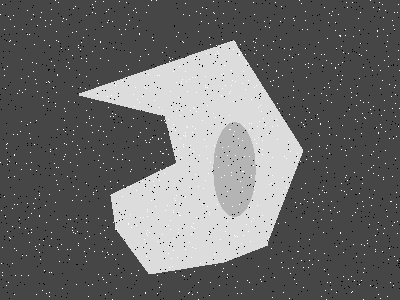

In [164]:
Noise.SaltAndPepper(model)
model.Show()

Гистограмма и функция распределения шума (гистограмма ничем не отличается, кроме пиков на концах)

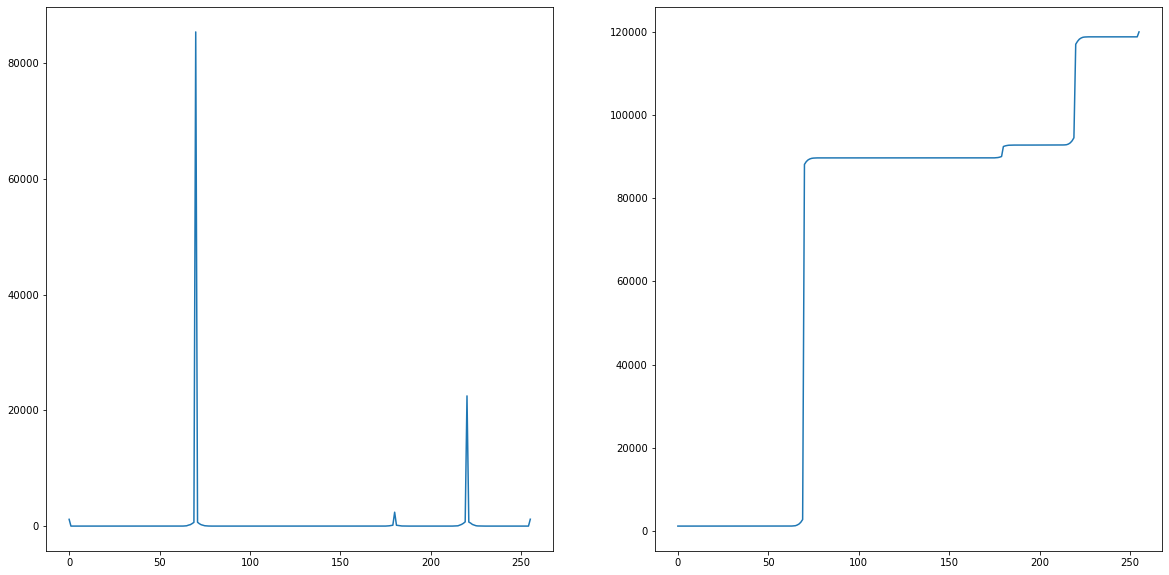

In [165]:
model.PrintHistAndCdf()

Усредняющий фильтр:

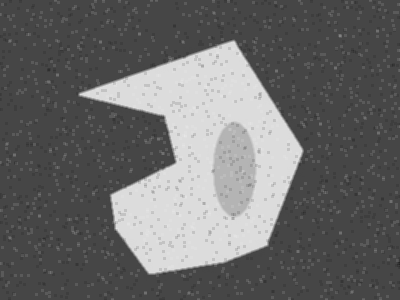

In [166]:
copy = model.Copy()
filt = Filters.Mean(copy)
copy.arr = filt
copy.Consistent()
copy.Show()

Медианный фильтр:

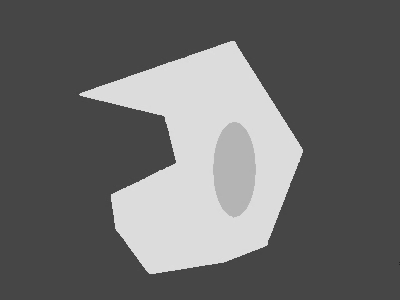

In [167]:
copy = model.Copy()
filt = Filters.Median(copy)
copy.arr = filt
copy.Consistent()
copy.Show()

## Случайный шум

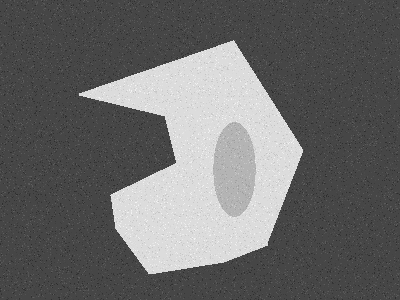

In [168]:
model = MImage('model.png')
Noise.Random(model, 0.2, scale = (-25, 25))
model.Show()

Гистограмма и функция распределения случайного шума (при случайном шуме особенно заметны изменения функции распределения -- углы "ступенек" сгладились)

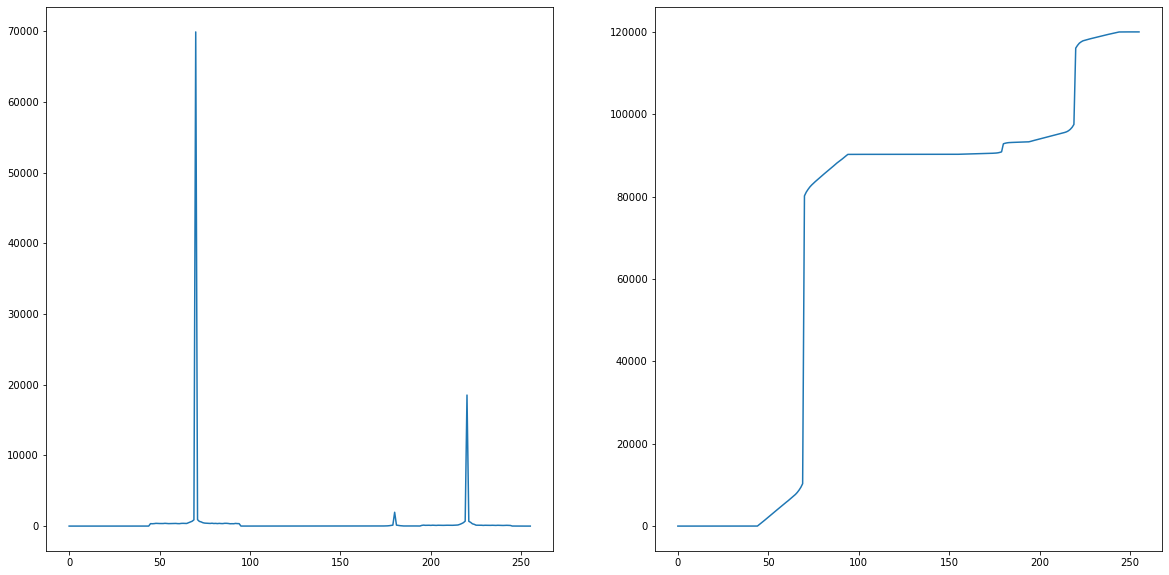

In [171]:
model.PrintHistAndCdf()

Усредняющий фильтр:

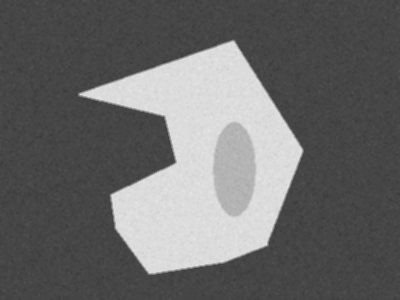

In [172]:
copy = model.Copy()
filt = Filters.Mean(copy)
copy.arr = filt
copy.Consistent()
copy.Show()

Медианный фильтр:

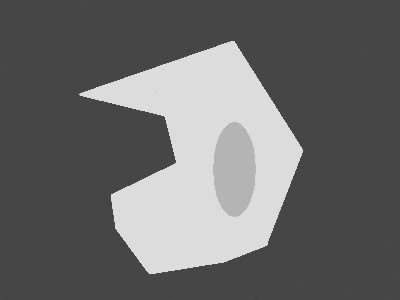

In [173]:
copy = model.Copy()
filt = Filters.Median(copy)
copy.arr = filt
copy.Consistent()
copy.Show()

## Смесь шумов

0.4 -- шум типа Соль&Перец, 0.6 -- случайный шум

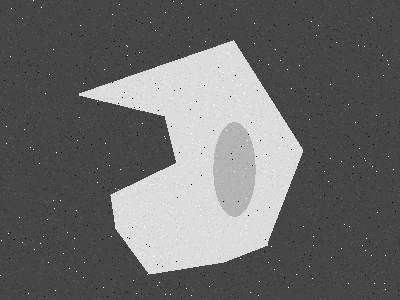

In [174]:
model = MImage('model.png')
Noise.Mix(model,  
          randomProb = 0.6, 
          SPProb = 0.4, 
          saltProb= 0.01 , 
          pepperProb = 0.01, 
          probability = 0.2, 
          scale = (-25, 25)
         )
model.Show()

Гистограмма и функция распределения смеси шумов

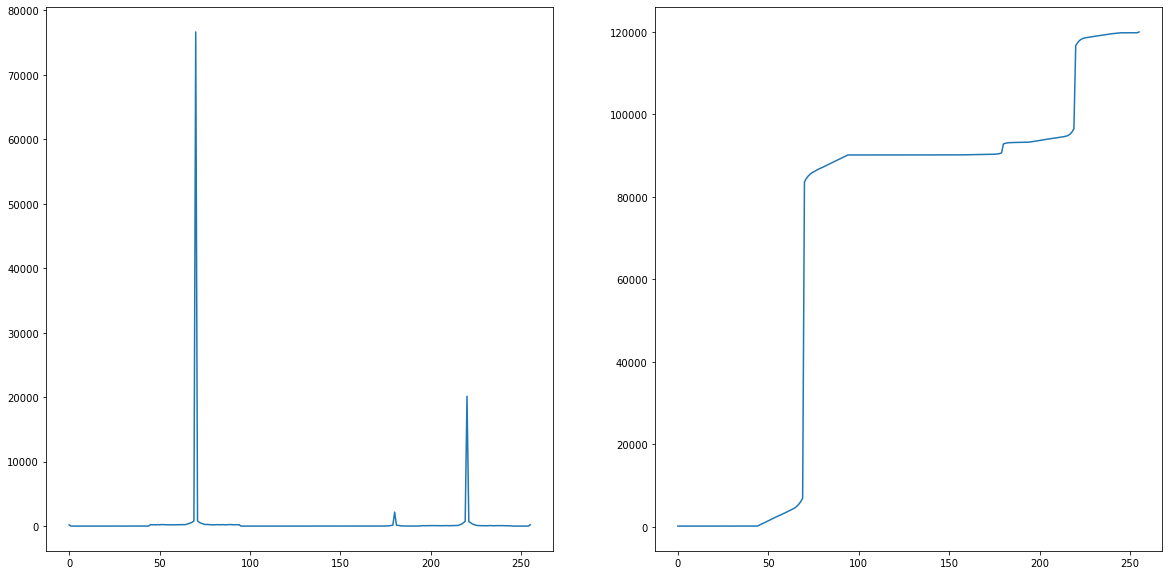

In [175]:
model.PrintHistAndCdf()

Усредняющий фильтр:

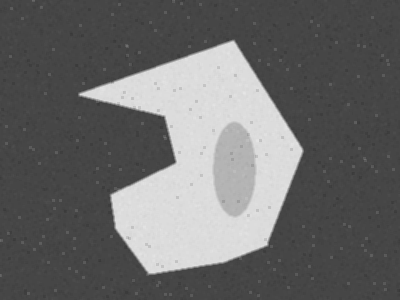

In [176]:
copy = model.Copy()
filt = Filters.Mean(copy)
copy.arr = filt
copy.Consistent()
copy.Show()

Медианный фильтр:

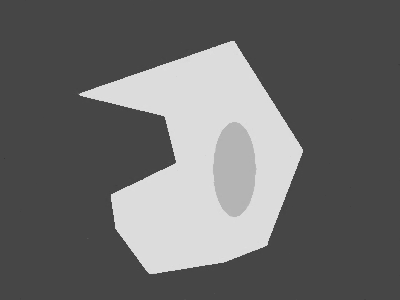

In [62]:
copy = model.Copy()
filt = Filters.Median(copy)
copy.arr = filt
copy.Consistent()
copy.Show()

## Вывод: 
Во всех рассмотренных случаях, использование медианного фильтра оказывалось лучше усредняющего фильтра. 

# Лабораторная работа 8

## Модель кардиограммы

In [9]:
h = Model.FMultiplicative([Functions.garmonic(1,50) , Functions.exp(0.1,1)#lambda t: np.sin(2*np.pi*1*t)#, Functions.exp(0.005, 1)
                          ], N=200);
h['x'] = h['x'] / h.x.max()

[Text(0.5, 0, 't'), Text(0, 0.5, 'x')]

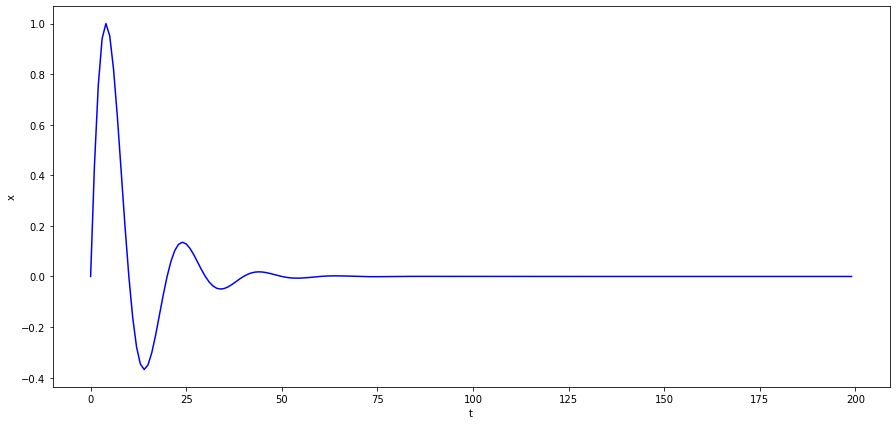

In [10]:
plt.subplots(1,1, figsize=(15,7))
ax = sns.lineplot(data=h.x, color='blue')
ax.set(xlabel='t', ylabel='x')

Спектр модели кардиограммы:

<AxesSubplot:>

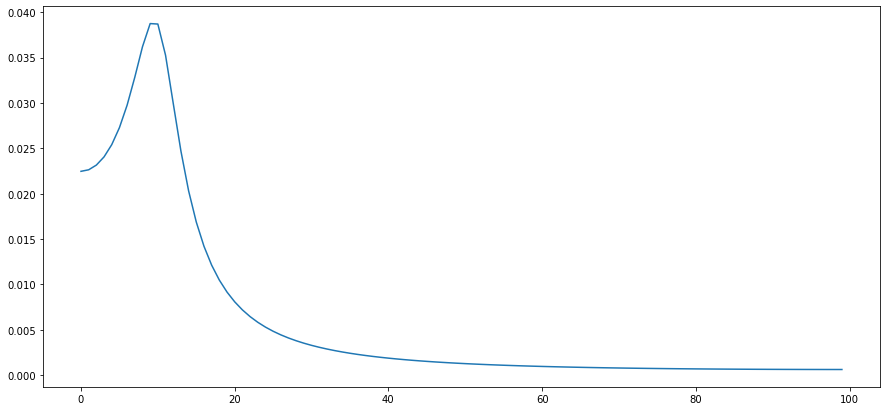

In [133]:
x = np.array(h.x)
plt.subplots(1,1, figsize=(15,7))
sns.lineplot(data=Fourier.Direct(x))

Результат обратного преобразования:

<AxesSubplot:>

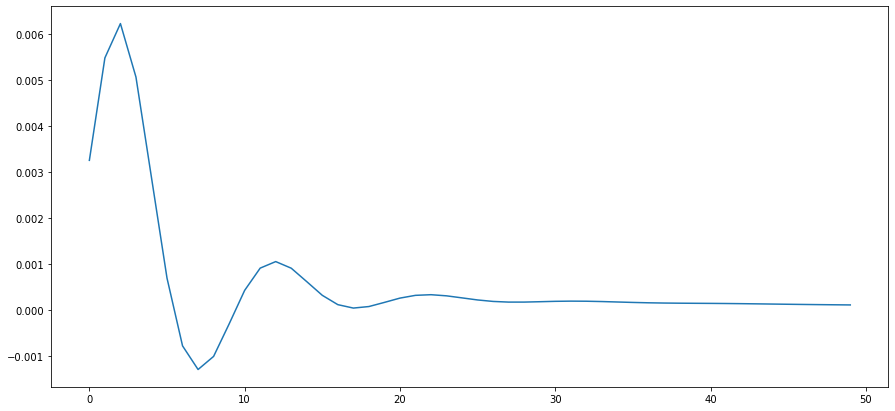

In [74]:
plt.subplots(1,1, figsize=(15,7))
sns.lineplot(data=Fourier.Inverse(Fourier.Direct(x, Amp=False)))

## Изменение размеров изображения

Загружаем изображение:

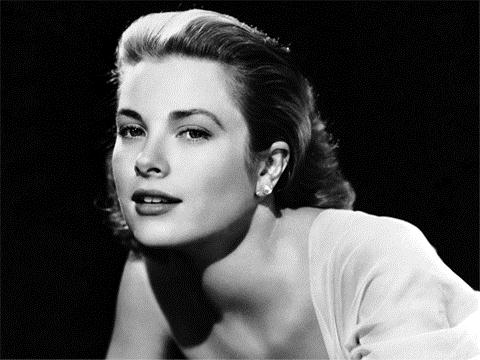

In [136]:
img = MImage('images/grace.png')
img.Show()

Применяем к нему двумерное преобразование

In [140]:
ft2 = Fourier.F2d(img.arr)

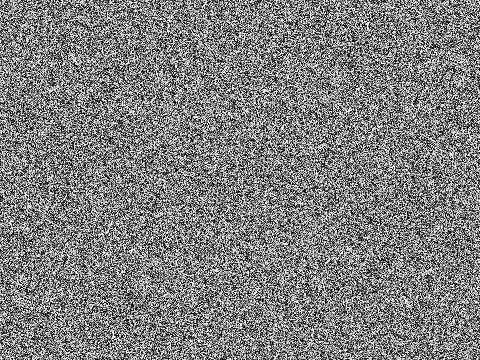

In [141]:
f = MImage(); f.arr = np.abs(ft2); 
f.Consistent(); f.Show()

Увеличим изображени в 2 раза добавив нулевые строки в спектр.

In [150]:
resized = Fourier.Resize(ft2, scale=2)
# f.arr = np.abs(resized) 
# f.Consistent(); f.Show()

Восстанавливаем изображение с помощью обратного преобразования:

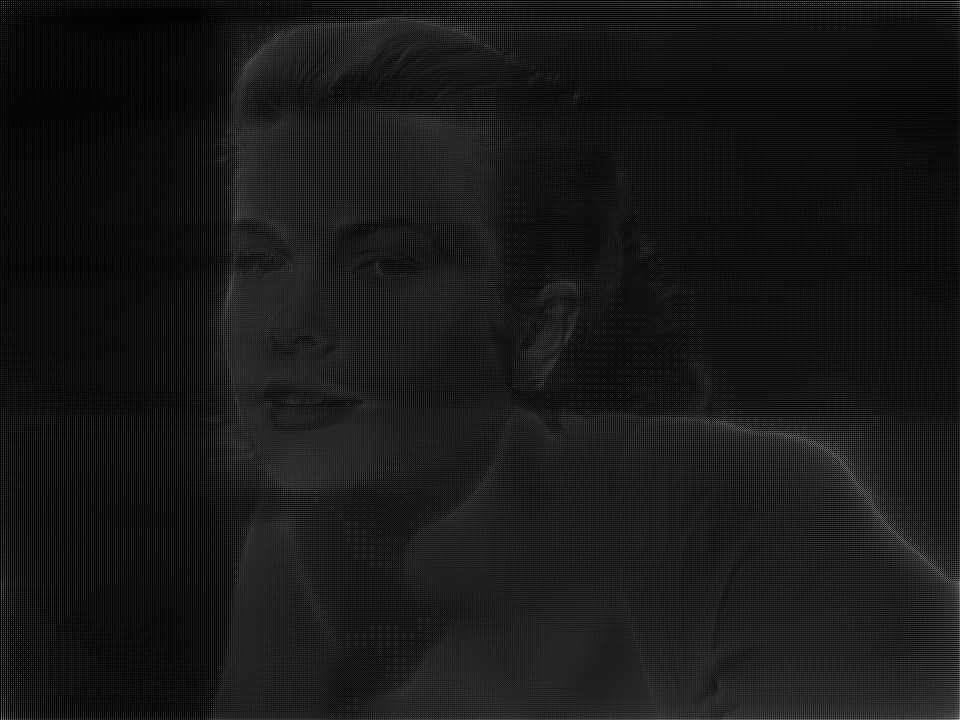

In [154]:
restored = Fourier.iF2d(resized)
f.arr = np.abs(restored) 
f.Consistent(); f.Show()

Изменение размера с помошью преобразования Фурье сильно исказило изображение.